In [1]:
import pandas as pd
import numpy as np

In [2]:
loans_data = pd.read_csv("../data/shared_with_gilbert_for_training.csv")

In [3]:
loans_data.head()

,Unnamed: 0,customer_no,account_age,income,residential_type,rent_expense,employer_name,highest_education,highest_education2,residential_type2,...,prev_desiredAmount_diff,first_desiredAmount_comp,first_desiredAmount_diff,first_applicationtime_elapse,prev_applicationtime_elapse,loan_status,paid_date,total_principal_paid,total_interest_paid,last_repaid_date
0,110523,771846266,116,90000.0,Rented House,450000,springtrust,Graduate,Graduate,Rented,...,100000.0,False,100000.0,116.0,116.0,0,2019-09-25 19:50:59,15000.0,2250.0,2019-09-25 19:50:56 UTC
1,166259,637257654,631,100000.0,Rented House,25000,Computer business center,Graduate,Graduate,Rented,...,0.0,True,0.0,4.0,288.0,1,2019-09-19 22:38:19,2500.0,375.0,2019-09-19 22:38:17 UTC
2,10085,506142707,253,30000.0,Owned House,24000,Opeyemi Stores,Graduate,Graduate,Own Residence,...,970000.0,True,0.0,15.0,131.0,1,NaN,0.0,0.0,NaN
3,78465,728957720,852,50000.0,Family house,0,Trading,Graduate,Graduate,Family Owned,...,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0,NaN
4,3664,607928592,0,110000.0,Rented House,80,Mtn solar,Graduate,Graduate,Rented,...,NaN,NaN,NaN,NaN,NaN,0,2019-07-30 20:23:56,10000.0,1500.0,2019-07-30 20:23:53 UTC


In [4]:
loans_data.shape

(5020, 85)

In [5]:
loans_data.columns

Index(['Unnamed: 0', 'customer_no', 'account_age', 'income',
       'residential_type', 'rent_expense', 'employer_name',
       'highest_education', 'highest_education2', 'residential_type2',
       'os_version', 'time_at_current_address', 'resident_state', 'bank',
       'marital_status', 'employment_status', 'gender', 'number_children',
       'biological_age', 'device', 'industry_sector',
       'smsFeatures_minmaxdebit_tot', 'smsFeatures_mixmaxcredit_tot',
       'smsFeatures_pers_sms_snt_flag', 'smsFeatures_pers_sms_rec_flag',
       'smsFeatures_avg_cred_tx_val', 'contactfeatures_ratio_surnames',
       'contactfeatures_no_contacts', 'prev_income_diff', 'prev_income_comp',
       'first_income_diff', 'first_income_comp', 'first_maritalStatus_comp',
       'prev_maritalStatus_comp', 'first_employer_comp', 'prev_employer_comp',
       'first_rentExpense_comp', 'first_rentExpense_diff',
       'prev_rentExpense_comp', 'prev_rentExpense_diff', 'okash_sms_no',
       'fairmoney_sms_no

In [ ]:
model_features = ['gender','biological_age','marital_status','number_children','highest_education','bank',
                 'employment_status', 'income','industry_sector','residential_type','resident_state',
                 'rent_expense','time_at_current_address','device','os_version','loan_purpose','loan_status',
                  'loan_amount', 'amount_requested', 'term_months','num_applications','application_date',
                  'disbursement_date', 'approval_date','application_week', 'application_time',]

In [7]:
#creating training data and test data
training_data = loans_data.sample(frac=0.75, random_state = 12345)
testing_data  = loans_data.drop(training_data.index)

print('Data for modelling:' + str(training_data.shape))
print('Data for model testing:' + str(testing_data.shape))

#saving the data on local folder
training_data.to_csv("../data/training_data.csv", index = False)
testing_data.to_csv("../data/testing_data.csv", index = False)

Data for modelling:(3750, 30)
Data for model testing:(1250, 30)


In [8]:
non_modelling_columns = ['customer_id','loan_id', 'application_date', 'disbursement_date','approval_date','due_date',
                        'last_repaid_date','total_principal_due', 'total_interest_due','total_principal_paid',
                         'total_interest_paid','loan_amount']

loans_df = training_data.drop(columns = non_modelling_columns, axis = 1)

In [9]:
non_modelling_columns2 = ['customer_id','loan_id', 'application_date', 'disbursement_date','approval_date','due_date',
                        'last_repaid_date']

testing_df = testing_data.drop(columns = non_modelling_columns2, axis = 1)

In [10]:
loans_df.shape

(3750, 18)

In [11]:
from pycaret.classification import *

In [12]:
#!pip install pycaret --user

In [13]:
loans_df['loan_status'].value_counts(dropna=False)

0    2729
1    1021
Name: loan_status, dtype: int64

In [14]:
exp_clf = setup(data=loans_df, target = 'loan_status', session_id = 123)

,Description,Value
0,session_id,123
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3750, 18)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
best_model =  compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7260,0.5028,0.0000,0.0000,0.0000,-0.0045,-0.0157,0.8030
rf,Random Forest Classifier,0.7241,0.5804,0.0364,0.4037,0.0664,0.0239,0.0487,0.4300
gbc,Gradient Boosting Classifier,0.7241,0.5922,0.0575,0.4195,0.0995,0.0410,0.0672,0.4080
catboost,CatBoost Classifier,0.7241,0.5976,0.0576,0.4533,0.1016,0.0418,0.0749,2.3960
ridge,Ridge Classifier,0.7237,0.0000,0.0729,0.4456,0.1236,0.0531,0.0838,0.0410
lda,Linear Discriminant Analysis,0.7195,0.6088,0.1136,0.4455,0.1793,0.0770,0.1044,0.0650
ada,Ada Boost Classifier,0.7161,0.5935,0.0855,0.4023,0.1400,0.0488,0.0710,0.1690
et,Extra Trees Classifier,0.7096,0.5500,0.0841,0.3490,0.1349,0.0354,0.0476,0.4200
lightgbm,Light Gradient Boosting Machine,0.7001,0.5783,0.1416,0.3723,0.2039,0.0623,0.0744,0.3010
xgboost,Extreme Gradient Boosting,0.6890,0.5625,0.1696,0.3533,0.2283,0.0628,0.0699,0.9180


In [16]:
lr =create_model('lr', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.72,0.48,0.00,0.00,0.00,-0.02,-0.05
1,0.73,0.47,0.00,0.00,0.00,0.00,0.00
2,0.72,0.53,0.00,0.00,0.00,-0.01,-0.04
3,0.73,0.52,0.00,0.00,0.00,0.00,0.00
4,0.73,0.49,0.00,0.00,0.00,0.00,0.00
5,0.73,0.51,0.00,0.00,0.00,0.00,0.00
6,0.73,0.50,0.00,0.00,0.00,0.00,0.00
7,0.73,0.53,0.00,0.00,0.00,0.00,0.00
8,0.72,0.54,0.00,0.00,0.00,-0.02,-0.07
9,0.73,0.47,0.00,0.00,0.00,0.00,0.00


In [17]:
tuned_lr = tune_model(lr, optimize ='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4715,0.4747,0.4861,0.2555,0.3349,-0.0374,-0.0428
1,0.5057,0.5521,0.5417,0.2868,0.3750,0.0265,0.0302
2,0.4677,0.5145,0.6111,0.2821,0.3860,0.0181,0.0224
3,0.4753,0.4522,0.4085,0.2320,0.2959,-0.0739,-0.0814
4,0.5305,0.5204,0.5493,0.3000,0.3881,0.0578,0.0648
5,0.4847,0.4842,0.4930,0.2612,0.3415,-0.0198,-0.0226
6,0.4466,0.4876,0.4648,0.2357,0.3128,-0.0731,-0.0850
7,0.5038,0.5639,0.4789,0.2677,0.3434,-0.0064,-0.0071
8,0.6031,0.5649,0.2817,0.2740,0.2778,0.0042,0.0042
9,0.5115,0.5231,0.4789,0.2720,0.3469,0.0020,0.0022


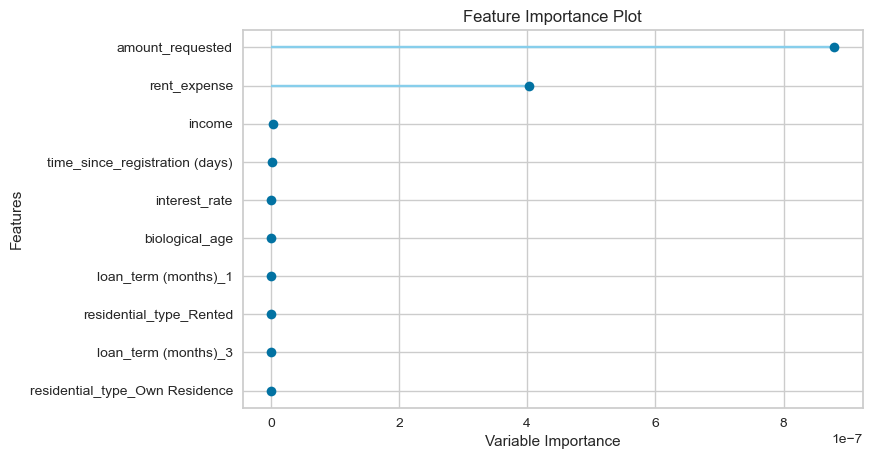

In [18]:
plot_model(tuned_lr,plot ='feature')

In [19]:
#plot_model(tuned_lr, plot ='confusion_matrix')

In [20]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
final_lr = finalize_model(tuned_lr)

In [22]:
test_data_predictions = predict_model(final_lr , data = testing_df)
test_data_predictions.head()

,time_since_registration (days),income,rent_expense,highest_education,residential_type,time_at_current_address (months),resident_location,marital_status,employment_status,gender,...,loan_term (months),total_principal_due,total_interest_due,interest_rate,loan_purpose,loan_status,total_principal_paid,total_interest_paid,Label,Score
4,0,25000.0,130000,Graduate,Rented,2,OGUN,Single,Self-Employed,MALE,...,1,2000.0,300.0,15.0,house,0,2000.0,300.0,0,0.5128
5,177,50000.0,160000,Secondary,Rented,36+,ANAMBRA,Single,Self-Employed,MALE,...,1,4000.0,600.0,15.0,house,0,4000.0,600.0,0,0.5218
10,5,350000.0,500000,Graduate,Rented,7,ABUJA,Married,Self-Employed,MALE,...,1,11500.0,3450.0,30.0,business,0,11500.0,3450.0,0,0.5437
13,0,80000.0,80000,Graduate,Rented,6,NIGER,Married,Self-Employed,MALE,...,1,2500.0,375.0,15.0,business,0,2500.0,375.0,0,0.5065
14,110,100000.0,0,Graduate,Own Residence,18,OYO,Single,Self-Employed,FEMALE,...,1,10000.0,3600.0,36.0,business,0,10000.0,3600.0,1,0.5033


In [23]:
#saving model
save_model(final_lr , "../model/Final LR Model")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='loan_status', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=0.049, class_weight='balanced',
                     

In [24]:
test_data_predictions.to_csv('../predictions/LR_model_test_preditions.csv', index = False)